<a href="https://colab.research.google.com/github/hanaforoosh/apollo/blob/master/Source/Modularity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import networkx as nx
import pickle

In [0]:
# graph 1
ctrl = pickle.load(open('ctrl_graph.p','rb'))
planning = pickle.load(open('planning_graph.p','rb'))

In [0]:
print(G1.edges.data())

[('PIDBCController', 'PIDController', {'type': 'Generalization'}), ('LonController', 'Controller', {'type': 'Generalization'}), ('LonController', 'PIDController', {'type': 'Association'}), ('LonController', 'LeadlagController', {'type': 'Association'}), ('LatController', 'Controller', {'type': 'Generalization'}), ('LatController', 'TrajectoryAnalyzer', {'type': 'Association'}), ('LatController', 'LeadlagController', {'type': 'Association'}), ('LatController', 'MracController', {'type': 'Association'}), ('MPCController', 'Controller', {'type': 'Generalization'}), ('MPCController', 'TrajectoryAnalyzer', {'type': 'Association'}), ('PIDICController', 'PIDController', {'type': 'Generalization'})]


# Graph visualization

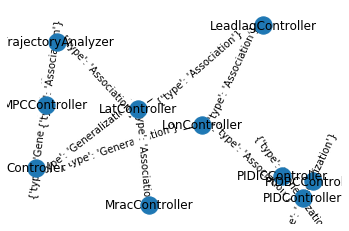

In [0]:
pos=nx.spring_layout(G1)
nx.draw_networkx_edge_labels(G1,pos)
nx.draw(G1,pos,with_labels = True)

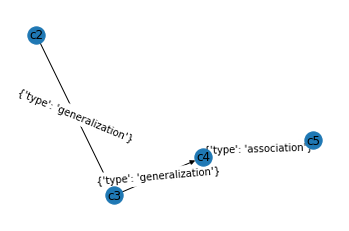

In [0]:
pos=nx.spring_layout(G2)
nx.draw_networkx_edge_labels(G2,pos)
nx.draw(G2,pos,with_labels = True)

# merge two graphs

In [0]:
def merge_graphs(G1,G2):
    g2_edges_list = G2.edges.data()
    for edge in g2_edges_list :
        if (G1.get_edge_data(edge[0],edge[1]) != None ):
            if (G1[edge[0]][edge[1]]['type'] != edge[2]['type']):
                G1[edge[0]][edge[1]]['type'] = G1[edge[0]][edge[1]]['type'] + '+' + edge[2]['type']
        else :
            G1.add_edge(edge[0],edge[1],type = edge[2]['type'])  
    return G1

G = merge_graphs(G1,G2)



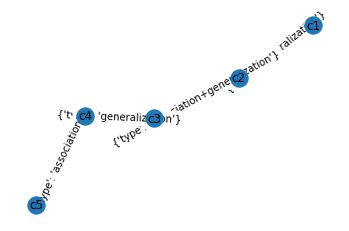

In [0]:
pos=nx.spring_layout(G)
nx.draw_networkx_edge_labels(G,pos)
nx.draw(G,pos,with_labels = True)